In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

生成性别预测图

C:\Users\Gao\.conda\envs\AIF360\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gao\.conda\envs\AIF360\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gao\.conda\envs\AIF360\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gao\.conda\envs\AIF360\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

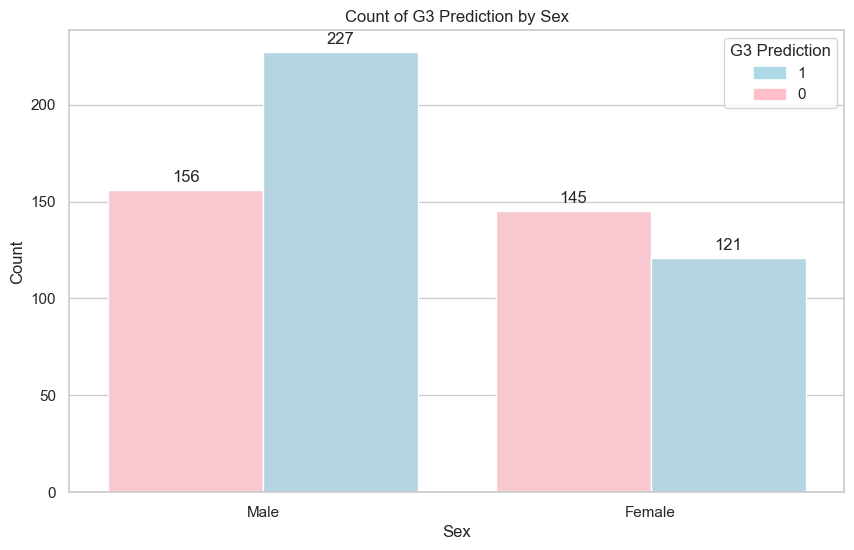

In [2]:
# 读取数据
file_path = 'C:/Code/StudentPerformance_Pre/stuper_pre.csv'
data = pd.read_csv(file_path)

# 创建sex标签
data['sex_label'] = data['sex'].map({1: 'Male', 0: 'Female'})

# 将G3_prediction转换为字符串
data['G3_prediction_str'] = data['G3_prediction'].astype(str)

# 设置图表风格
sns.set(style="whitegrid")

# 绘制柱状图
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='sex_label', hue='G3_prediction_str', data=data, palette={'0': 'pink', '1': 'lightblue'})

# 设置图表标签和标题
bar_plot.set_xlabel('Sex')
bar_plot.set_ylabel('Count')
bar_plot.set_title('Count of G3 Prediction by Sex')

# 在柱状图上显示数字
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# 创建自定义图例
legend_labels = {'1': 'lightblue', '0': 'pink'}
legend_patches = [Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, title='G3 Prediction', loc='upper right')

# 显示图表
plt.show()


In [3]:
df = pd.read_csv(file_path)
# 查看数据集的列类型
print("数据集的每列类型：")
print(df.dtypes)

# 获取分类数据类型的列
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("\n分类数据类型的特征：", categorical_columns)

# 统计分类特征的数量
num_categorical_features = len(categorical_columns)
print("\n分类特征的数量：", num_categorical_features)

# 查看数据集的总特征数量
num_features = df.shape[1]
print("\n数据集总共有", num_features, "个特征")

数据集的每列类型：
Unnamed: 0            int64
sex                   int64
age                   int64
Medu                  int64
Fedu                  int64
traveltime            int64
studytime             int64
failures              int64
famrel                int64
freetime              int64
goout                 int64
Dalc                  int64
Walc                  int64
health                int64
absences              int64
G1                    int64
G2                    int64
schoolsup_encoded     int64
famsup_encoded        int64
paid_encoded          int64
activities_encoded    int64
nursery_encoded       int64
higher_encoded        int64
internet_encoded      int64
romantic_encoded      int64
school_MS             int64
address_U             int64
famsize_LE3           int64
Pstatus_T             int64
reason_home           int64
reason_other          int64
reason_reputation     int64
guardian_mother       int64
guardian_other        int64
Mjob_health           int64
Mjob_other

In [4]:
import pandas as pd

# 假设 df 是你的数据集
# 读取数据
# df = pd.read_csv('data.csv')

# 统计每个分类特征的数量和百分比
summary = {}

# 遍历每个分类特征
for column in df.select_dtypes(include=['object', 'int64']).columns:
    counts = df[column].value_counts()  # 计算每个标签的数量
    percentages = df[column].value_counts(normalize=True) * 100  # 计算每个标签的百分比
    
    # 格式化输出每个特征的统计数据
    summary[column] = pd.DataFrame({
        'n': counts,
        'n (%)': counts.astype(str) + ' (' + percentages.round(2).astype(str) + '%)'
    })

# 输出每个特征的统计结果
for column, stats in summary.items():
    print(f"\n统计 {column} 列:")
    print(stats)



统计 Unnamed: 0 列:
            n      n (%)
Unnamed: 0              
0           1  1 (0.15%)
446         1  1 (0.15%)
428         1  1 (0.15%)
429         1  1 (0.15%)
430         1  1 (0.15%)
...        ..        ...
218         1  1 (0.15%)
219         1  1 (0.15%)
220         1  1 (0.15%)
221         1  1 (0.15%)
648         1  1 (0.15%)

[649 rows x 2 columns]

统计 sex 列:
       n         n (%)
sex                   
1    383  383 (59.01%)
0    266  266 (40.99%)

统计 age 列:
       n         n (%)
age                   
17   179  179 (27.58%)
16   177  177 (27.27%)
18   140  140 (21.57%)
15   112  112 (17.26%)
19    32    32 (4.93%)
20     6     6 (0.92%)
21     2     2 (0.31%)
22     1     1 (0.15%)

统计 Medu 列:
        n         n (%)
Medu                   
2     186  186 (28.66%)
4     175  175 (26.96%)
1     143  143 (22.03%)
3     139  139 (21.42%)
0       6     6 (0.92%)

统计 Fedu 列:
        n         n (%)
Fedu                   
2     209   209 (32.2%)
1     174  174 (26.81%)
3

年龄分布直方图：
显示学生年龄的分布情况。

C:\Users\Gao\.conda\envs\AIF360\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gao\.conda\envs\AIF360\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


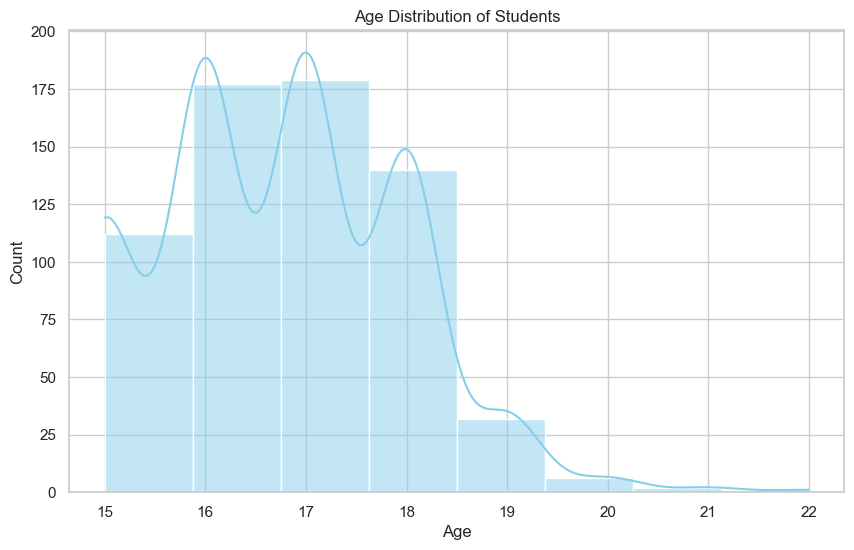

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=8, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Students')
plt.show()

大多数学生的年龄集中在15到19岁之间。16岁和17岁的学生人数最多，分别达到直方图的最高峰。从19岁开始，学生人数显著减少，20岁及以上的学生数量很少。
数据显示学生的主要年龄段集中在高中时期（通常为15-18岁），这符合学生在这个年龄段上学的普遍现象。
20岁及以上的学生数量非常少，可能是数据集中特殊的案例或者少数重复留级的学生。
年龄在15岁以下和21岁以上的学生几乎没有，这也符合一般的教育年龄分布。

家庭教育背景箱线图：
分别显示母亲教育程度（Medu）和父亲教育程度（Fedu）对最终成绩（G3）的影响。

C:\Users\Gao\.conda\envs\AIF360\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gao\.conda\envs\AIF360\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gao\.conda\envs\AIF360\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


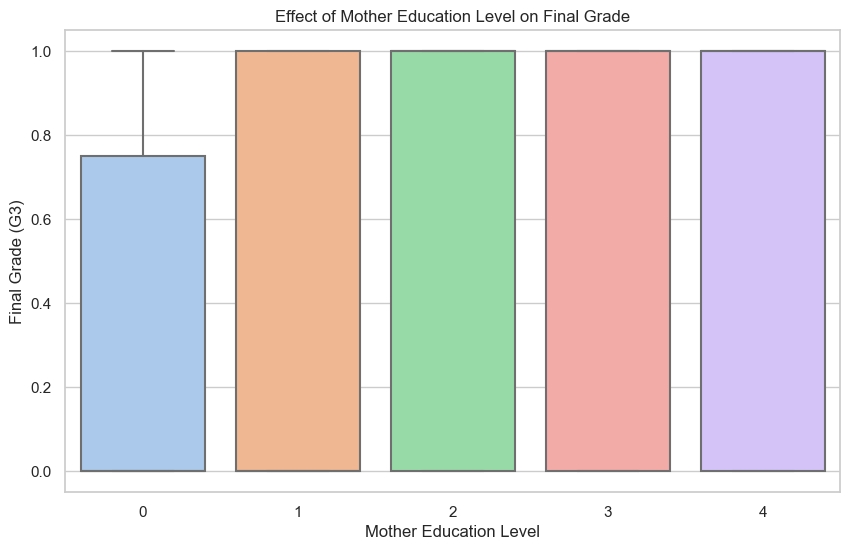

C:\Users\Gao\.conda\envs\AIF360\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gao\.conda\envs\AIF360\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gao\.conda\envs\AIF360\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


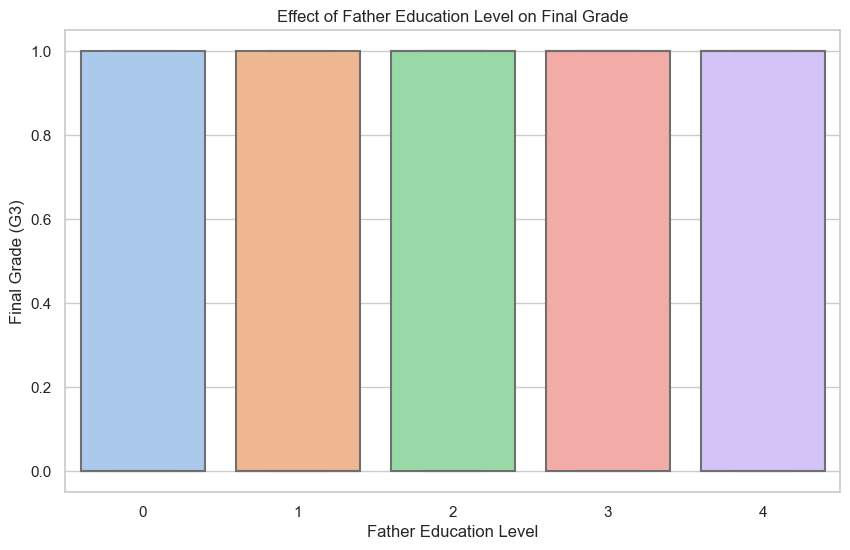

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medu', y='G3_prediction', data=data, palette='pastel')
plt.xlabel('Mother Education Level')
plt.ylabel('Final Grade (G3)')
plt.title('Effect of Mother Education Level on Final Grade')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fedu', y='G3_prediction', data=data, palette='pastel')
plt.xlabel('Father Education Level')
plt.ylabel('Final Grade (G3)')
plt.title('Effect of Father Education Level on Final Grade')
plt.show()


从这些图表中，我们可以观察到母亲和父亲的教育程度对学生最终成绩预测的影响相对较小。无论是母亲还是父亲的教育程度为多少，学生的最终成绩预测都集中在较高的区间内。
可能需要结合其他特征（如学习时间、出勤率等）进行更详细的分析，以确定其他因素对学生成绩的影响。